# 8. Spatial Econometrics

In [1]:
import esda
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
import libpysal as lps
import numpy as np
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline

In [2]:
covidvisual = pd.read_excel('covidvisualApril5th2023.xlsx')

In [3]:
covidvisual.head(3)

,Country,Country Code,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Albania,ALB,41.0,20.0,67,0.796,76.4626,14.448000,11.286455,14131.110390,...,NaN,"1,709",NaN,"1,941,032",2866374,Europe,NaN,NaN,596,125.663992
1,Algeria,DZA,28.0,3.0,91,0.745,76.3767,14.626896,8.069284,10800.225460,...,NaN,"81,825",NaN,"230,861",45350148,Africa,0.1,NaN,"1,804",15.173049
2,Angola,AGO,-12.5,18.5,148,0.586,61.6434,12.172100,5.417391,5465.617791,...,NaN,41,NaN,"1,499,795",35027343,Africa,NaN,NaN,1,5.518546


In [4]:
covidvisual.shape

(149, 43)

In [5]:
covidvisual.columns

Index(['Country', 'Country Code', 'Latitude', 'Longitude', 'HDI rank',
       'Human Development Index 2021 (HDI)', 'Life expectancy at birth',
       'Expected years of schooling', 'Mean years of schooling',
       'Gross national income (GNI) per capita', 'GDP 2021 (US$)',
       'GDP per capita 2021 (US$)', 'GDP growth 2021 (annual %)',
       'Inflation Rate 2021 (%)', 'Unemployment Rate 2021 (%)', 'Region',
       'IncomeGroup', 'total_vaccinations', 'date', 'people_vaccinated',
       'people_fully_vaccinated', 'daily_vaccinations_raw',
       'daily_vaccinations', 'total_vaccinations_per_hundred',
       'people_vaccinated_per_hundred', 'people_fully_vaccinated_per_hundred',
       'daily_vaccinations_per_million', 'Country,Other', 'TotalCases',
       'NewCases', 'TotalDeaths', 'NewDeaths', 'TotalRecovered',
       'NewRecovered', 'ActiveCases', 'Serious,Critical', 'TotalTests',
       'Population', 'Continent', 'New Cases/1M pop', 'New Deaths/1M pop',
       'Active Cases/1M p

In [6]:
import shapely
shapely.speedups.disable()

In [7]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [8]:
world

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,7111024,Europe,Serbia,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,642550,Europe,Montenegro,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1895250,Europe,Kosovo,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1218208,North America,Trinidad and Tobago,TTO,43570.0,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [9]:
world.drop(['pop_est', 'continent', 'gdp_md_est'], axis = 1, inplace = True)

In [10]:
world.head(3)

,name,iso_a3,geometry
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,W. Sahara,ESH,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."


In [11]:
covidvisual.head(3)

,Country,Country Code,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Albania,ALB,41.0,20.0,67,0.796,76.4626,14.448000,11.286455,14131.110390,...,NaN,"1,709",NaN,"1,941,032",2866374,Europe,NaN,NaN,596,125.663992
1,Algeria,DZA,28.0,3.0,91,0.745,76.3767,14.626896,8.069284,10800.225460,...,NaN,"81,825",NaN,"230,861",45350148,Africa,0.1,NaN,"1,804",15.173049
2,Angola,AGO,-12.5,18.5,148,0.586,61.6434,12.172100,5.417391,5465.617791,...,NaN,41,NaN,"1,499,795",35027343,Africa,NaN,NaN,1,5.518546


In [12]:
world.rename({'iso_a3':'Country Code'}, axis = 1, inplace = True)

In [13]:
worldmerge = world.merge(covidvisual, how = 'inner', on ='Country Code', indicator = True) 
#in order to preserve the map and to avoid empty spaces on the map, the merge is how='left'

In [14]:
worldmerge.head(3)

,name,Country Code,geometry,Country,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,...,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000),_merge
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,-18.0,175.0,99,0.730,67.1140,14.736790,...,"1,017",NaN,"669,911",909466,Australia/Oceania,NaN,NaN,"1,118",97.089941,both
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,-6.0,35.0,160,0.549,66.2007,9.221490,...,NaN,7,NaN,63298550,Africa,NaN,NaN,662,1.336524,both
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,60.0,-95.0,15,0.936,82.6565,16.396259,...,"32,425",99,"66,343,123",38388419,North America,NaN,NaN,845,135.772718,both


In [15]:
worldmerge.drop('_merge', axis = 1, inplace = True)

In [16]:
worldmerge

,name,Country Code,geometry,Country,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,-18.0000,175.0,99,0.730,67.1140,14.736790,...,NaN,"1,017",NaN,"669,911",909466,Australia/Oceania,NaN,NaN,"1,118",97.089941
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,-6.0000,35.0,160,0.549,66.2007,9.221490,...,NaN,NaN,7,NaN,63298550,Africa,NaN,NaN,662,1.336524
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,60.0000,-95.0,15,0.936,82.6565,16.396259,...,NaN,"32,425",99,"66,343,123",38388419,North America,NaN,NaN,845,135.772718
3,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,38.0000,-97.0,21,0.921,77.1982,16.280979,...,NaN,"1,062,241","1,895","1,174,878,661",334805269,North America,NaN,NaN,"3,173",345.176169
4,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,41.0000,64.0,101,0.727,70.8616,12.477140,...,NaN,"8,716",23,"1,377,915",34382084,Asia,NaN,NaN,254,4.761201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Bosnia and Herz.,BIH,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",Bosnia and Herzegovina,44.0000,18.0,74,0.780,75.3003,13.800000,...,NaN,"6,686",NaN,"1,884,721",3249317,Europe,NaN,NaN,"2,058",501.828538
132,Macedonia,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",Macedonia,41.8333,22.0,78,0.770,73.8415,13.624432,...,NaN,758,NaN,"2,226,216",2081304,Europe,NaN,NaN,364,464.420383
133,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,44.0000,21.0,63,0.802,74.1923,14.400090,...,NaN,"14,155",12,"12,648,684",8653016,Europe,NaN,NaN,"1,636",207.788822
134,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,42.0000,19.0,49,0.832,76.3426,15.081610,...,+60,679,6,"2,736,615",627950,Europe,97.0,NaN,"1,081",448.443347


<AxesSubplot:>

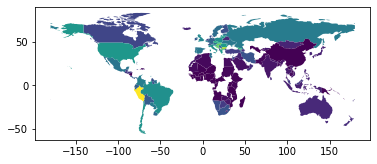

In [17]:
worldmerge.plot(column='covid_mortality_rate (per 100000)')

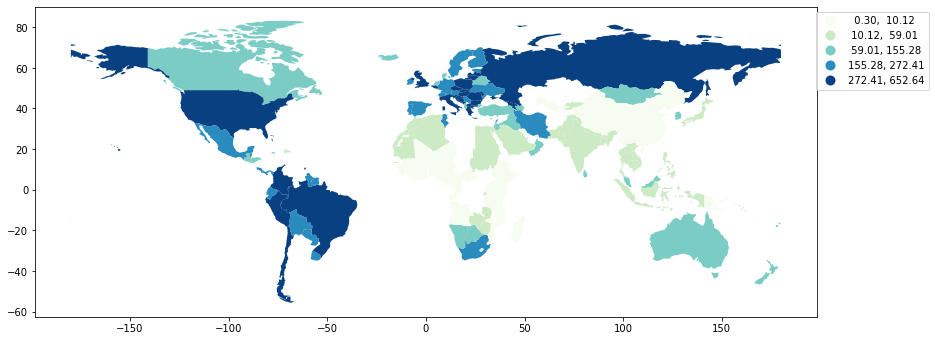

In [18]:
fig, ax = plt.subplots(figsize=(14,10), subplot_kw={'aspect':'equal'})
worldmerge.plot(column='covid_mortality_rate (per 100000)', scheme='Quantiles', k=5, cmap='GnBu', legend=True, ax=ax);
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.15, 1.0))
#ax.set_xlim(150000, 160000)
#ax.set_ylim(208000, 215000)

### 8.1 Spatial Autocorrelation

Sometimes, we observe visually-clustered patterns, 
but often there are no discernible statistical patterns, 
thus requiring testing. 
Spatial autocorrelation pertains to the combination of two types of similarity - spatial and attribute similarity.

#### 8.1.1 Spatial Similarity

In [19]:
#queen contiguity for spatial weights is defined
#w = Queen.from_dataframe(df, idVariable='name')
#knn1 = lps.weights.KNN.from_dataframe(df)
#queen = lps.weights.Queen.from_dataframe(df)

#symm_knn = lps.weights.WSP((knn1.sparse + knn1.sparse.T)>0).to_W()

#fully_connected = lps.weights.w_union(symm_knn, queen)

In [20]:
worldmerge

,name,Country Code,geometry,Country,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,-18.0000,175.0,99,0.730,67.1140,14.736790,...,NaN,"1,017",NaN,"669,911",909466,Australia/Oceania,NaN,NaN,"1,118",97.089941
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,-6.0000,35.0,160,0.549,66.2007,9.221490,...,NaN,NaN,7,NaN,63298550,Africa,NaN,NaN,662,1.336524
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,60.0000,-95.0,15,0.936,82.6565,16.396259,...,NaN,"32,425",99,"66,343,123",38388419,North America,NaN,NaN,845,135.772718
3,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,38.0000,-97.0,21,0.921,77.1982,16.280979,...,NaN,"1,062,241","1,895","1,174,878,661",334805269,North America,NaN,NaN,"3,173",345.176169
4,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,41.0000,64.0,101,0.727,70.8616,12.477140,...,NaN,"8,716",23,"1,377,915",34382084,Asia,NaN,NaN,254,4.761201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Bosnia and Herz.,BIH,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",Bosnia and Herzegovina,44.0000,18.0,74,0.780,75.3003,13.800000,...,NaN,"6,686",NaN,"1,884,721",3249317,Europe,NaN,NaN,"2,058",501.828538
132,Macedonia,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",Macedonia,41.8333,22.0,78,0.770,73.8415,13.624432,...,NaN,758,NaN,"2,226,216",2081304,Europe,NaN,NaN,364,464.420383
133,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,44.0000,21.0,63,0.802,74.1923,14.400090,...,NaN,"14,155",12,"12,648,684",8653016,Europe,NaN,NaN,"1,636",207.788822
134,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,42.0000,19.0,49,0.832,76.3426,15.081610,...,+60,679,6,"2,736,615",627950,Europe,97.0,NaN,"1,081",448.443347


In [21]:
df = worldmerge
wq =  lps.weights.Queen.from_dataframe(df, idVariable = 'Country Code')
wq.transform = 'r'

('WARNING: ', 'FJI', ' is an island (no neighbors)')
('WARNING: ', 'BHS', ' is an island (no neighbors)')
('WARNING: ', 'JAM', ' is an island (no neighbors)')
('WARNING: ', 'MDG', ' is an island (no neighbors)')
('WARNING: ', 'GMB', ' is an island (no neighbors)')
('WARNING: ', 'VUT', ' is an island (no neighbors)')
('WARNING: ', 'KOR', ' is an island (no neighbors)')
('WARNING: ', 'SLB', ' is an island (no neighbors)')
('WARNING: ', 'NZL', ' is an island (no neighbors)')
('WARNING: ', 'AUS', ' is an island (no neighbors)')
('WARNING: ', 'LKA', ' is an island (no neighbors)')
('WARNING: ', 'ISL', ' is an island (no neighbors)')
('WARNING: ', 'PHL', ' is an island (no neighbors)')
('WARNING: ', 'JPN', ' is an island (no neighbors)')
('WARNING: ', 'CYP', ' is an island (no neighbors)')
('WARNING: ', 'TTO', ' is an island (no neighbors)')


C:\Users\andre\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 21 disconnected components.
 There are 16 islands with ids: AUS, BHS, CYP, FJI, GMB, ISL, JAM, JPN, KOR, LKA, MDG, NZL, PHL, SLB, TTO, VUT.
  warnings.warn(message)


In [22]:
df = worldmerge
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'r'

('WARNING: ', 0, ' is an island (no neighbors)')
('WARNING: ', 13, ' is an island (no neighbors)')
('WARNING: ', 32, ' is an island (no neighbors)')
('WARNING: ', 56, ' is an island (no neighbors)')
('WARNING: ', 58, ' is an island (no neighbors)')
('WARNING: ', 65, ' is an island (no neighbors)')
('WARNING: ', 70, ' is an island (no neighbors)')
('WARNING: ', 104, ' is an island (no neighbors)')
('WARNING: ', 105, ' is an island (no neighbors)')
('WARNING: ', 106, ' is an island (no neighbors)')
('WARNING: ', 107, ' is an island (no neighbors)')
('WARNING: ', 112, ' is an island (no neighbors)')
('WARNING: ', 115, ' is an island (no neighbors)')
('WARNING: ', 122, ' is an island (no neighbors)')
('WARNING: ', 125, ' is an island (no neighbors)')
('WARNING: ', 135, ' is an island (no neighbors)')


C:\Users\andre\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 21 disconnected components.
 There are 16 islands with ids: 0, 13, 32, 56, 58, 65, 70, 104, 105, 106, 107, 112, 115, 122, 125, 135.
  warnings.warn(message)


In [23]:
worldmerge

,name,Country Code,geometry,Country,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,...,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,covid_mortality_rate (per 100000)
0,Fiji,FJI,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000...",Fiji,-18.0000,175.0,99,0.730,67.1140,14.736790,...,NaN,"1,017",NaN,"669,911",909466,Australia/Oceania,NaN,NaN,"1,118",97.089941
1,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,-6.0000,35.0,160,0.549,66.2007,9.221490,...,NaN,NaN,7,NaN,63298550,Africa,NaN,NaN,662,1.336524
2,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,60.0000,-95.0,15,0.936,82.6565,16.396259,...,NaN,"32,425",99,"66,343,123",38388419,North America,NaN,NaN,845,135.772718
3,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,38.0000,-97.0,21,0.921,77.1982,16.280979,...,NaN,"1,062,241","1,895","1,174,878,661",334805269,North America,NaN,NaN,"3,173",345.176169
4,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,41.0000,64.0,101,0.727,70.8616,12.477140,...,NaN,"8,716",23,"1,377,915",34382084,Asia,NaN,NaN,254,4.761201
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
131,Bosnia and Herz.,BIH,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",Bosnia and Herzegovina,44.0000,18.0,74,0.780,75.3003,13.800000,...,NaN,"6,686",NaN,"1,884,721",3249317,Europe,NaN,NaN,"2,058",501.828538
132,Macedonia,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",Macedonia,41.8333,22.0,78,0.770,73.8415,13.624432,...,NaN,758,NaN,"2,226,216",2081304,Europe,NaN,NaN,364,464.420383
133,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,44.0000,21.0,63,0.802,74.1923,14.400090,...,NaN,"14,155",12,"12,648,684",8653016,Europe,NaN,NaN,"1,636",207.788822
134,Montenegro,MNE,"POLYGON ((20.07070 42.58863, 19.80161 42.50009...",Montenegro,42.0000,19.0,49,0.832,76.3426,15.081610,...,+60,679,6,"2,736,615",627950,Europe,97.0,NaN,"1,081",448.443347


In [24]:
worldmerge.drop(worldmerge.index[[0, 13, 32, 56, 58, 65, 70, 104, 105, 106, 107, 112, 115, 122, 125, 135]], axis = 0, inplace = True)

In [25]:
worldmerge.reset_index(drop=True, inplace = True)

In [26]:
df = worldmerge
wq =  lps.weights.Queen.from_dataframe(df, idVariable = 'Country Code')
wq.transform = 'r'

C:\Users\andre\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


#### 8.1.2 Attribute Similarity

The spatial weight between neighborhoods i and j indicates if the two are neighbors. 
The spatial lag is a derived variable that is a measure of attribute of similarity that pairs up with the concept of spatial similarity.
The spatial lag for neighborhood i is as showed in the equation below.

$$ 
ylag_{i} = \sum_{j}w_{i,j}y_{j}
$$

In [27]:
#so, the spatial lag = average of the neighbors 

In [28]:
y = df['covid_mortality_rate (per 100000)']
ylag = lps.weights.lag_spatial(wq, y)

In [29]:
ylag

array([2.25286833e+02, 1.23920121e+02, 7.45408855e+01, 1.42982756e+02,
       1.62136834e+02, 1.36176447e+01, 8.81524279e+01, 2.43354440e+02,
       1.34643779e+02, 1.01093603e+02, 2.51060944e+02, 1.69935045e+02,
       8.39536133e+01, 8.77366644e+01, 1.59716995e+02, 1.39017614e+02,
       5.08116635e+02, 1.04899269e+02, 3.55452728e+02, 1.39874746e+02,
       7.49491105e+00, 3.39943514e+01, 1.89598480e+02, 2.08046866e+02,
       6.35293136e+01, 2.90751821e+02, 1.28981133e+02, 1.20652953e+02,
       2.29415993e+02, 6.42590941e+01, 1.53144378e+02, 3.70415593e+01,
       3.00993914e-01, 2.49053548e+02, 1.44565399e+02, 8.36007671e+01,
       1.76377825e+02, 1.07161236e+02, 8.09399829e+01, 1.68772153e+02,
       2.43743990e+02, 1.99838367e+02, 3.77608473e+01, 1.51297527e+02,
       1.51689606e+00, 1.85470986e+02, 7.69355672e+01, 1.64723051e+02,
       1.48597309e+02, 2.50305590e+02, 1.55284573e+02, 1.58891373e+02,
       4.76622089e+02, 1.72131585e+02, 3.00623979e+00, 2.23171222e+02,
      

In [30]:
import mapclassify as mc
ylagq5 = mc.Quantiles(ylag, k=5)

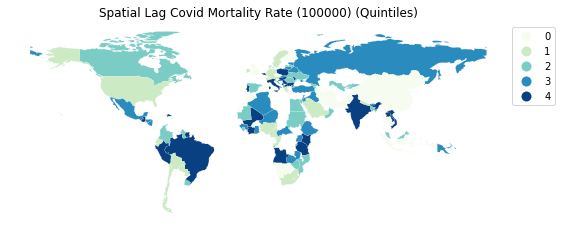

In [31]:
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=ylagq5.yb).plot(column='cl', categorical=True, \
        k=5, cmap='GnBu', linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.1, 1.0))
plt.title('Spatial Lag Covid Mortality Rate (100000) (Quintiles)')

plt.show()

In [32]:
#the quintile map for the spatial lag makes us think there's similarity in space

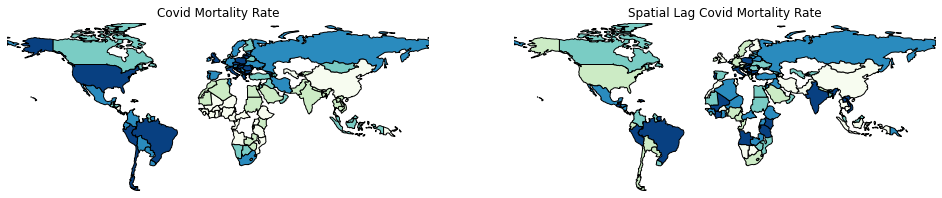

In [33]:
df['lag_coviddeathrate'] = ylag
f,ax = plt.subplots(1,2,figsize=(4.16*4,4))
df.plot(column='covid_mortality_rate (per 100000)', ax=ax[0], edgecolor='k',
        scheme='quantiles',  k=5, cmap='GnBu')
ax[0].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[0].set_title('Covid Mortality Rate')
df.plot(column='lag_coviddeathrate', ax=ax[1], edgecolor='k',
        scheme='quantiles', cmap='GnBu', k=5)
ax[1].axis(df.total_bounds[np.asarray([0,2,1,3])])
ax[1].set_title('Spatial Lag Covid Mortality Rate')
ax[0].axis('off')
ax[1].axis('off')
plt.show()

In [34]:
#on the left are the values of covid mortality rate and neighbors
#on the right are weighted average of covid death rates' neighbors, which is the spatial lag

### 8.2 Global Spatial Autocorrelation

In [35]:
#converting the attribute to a binary case to see it easily 

In [36]:
y.median()

116.67927528763295

In [37]:
yb = y > y.median()
sum(yb)

60

In [38]:
sum(y < y.median())

60

In [39]:
#there are 60 neighborhoods with covid death rate above the median and 60 (120-60=60) below the median

In [40]:
y

0        1.336524
1      135.772718
2      345.176169
3        4.761201
4        7.210373
          ...    
115     10.793749
116    501.828538
117    464.420383
118    207.788822
119    448.443347
Name: covid_mortality_rate (per 100000), Length: 120, dtype: float64

In [41]:
yb = y > y.median()
labels = ['0 Low', '1 High']
yb = [labels[i] for i in 1*yb] 
df['yb'] = yb

<AxesSubplot:>

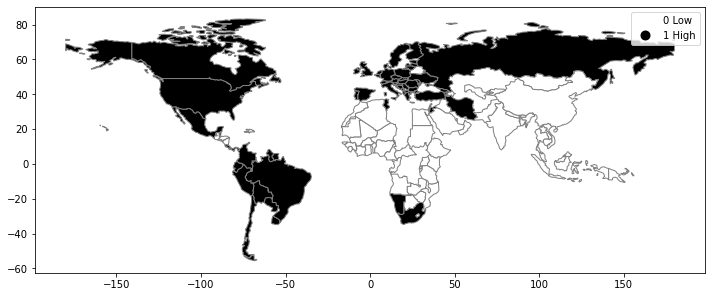

In [42]:
fig, ax = plt.subplots(figsize=(12,10), subplot_kw={'aspect':'equal'})
df.plot(column='yb', cmap='binary', edgecolor='grey', legend=True, ax=ax)

#### 8.2.1 Join Counts

In [43]:
# a join is a way to formalize a test for spatial autocorrelation in a binary attribute, it also exists for each 
#neighbor pair of observations, and the joins are reflected in the binary spatial weights object wq
#each unit can take either Black (B) or White (W), there are three type of joins, BB (black black), WW (white white), BW (black white or white black)
#finding out what is the number of BB joins if the 65 black polygons were randomly assingned on the map

In [44]:
import esda 
yb = 1 * (y > y.median()) # convert back to binary
wq =  lps.weights.Queen.from_dataframe(df)
wq.transform = 'b'
np.random.seed(12345)
jc = esda.join_counts.Join_Counts(yb, wq)

C:\Users\andre\anaconda3\lib\site-packages\libpysal\weights\weights.py:172: UserWarning: The weights matrix is not fully connected: 
 There are 5 disconnected components.
  warnings.warn(message)


In [45]:
jc.bb

92.0

In [46]:
jc.ww

75.0

In [47]:
jc.bw

31.0

In [48]:
jc.bb + jc.ww + jc.bw #all possibilites

198.0

In [49]:
wq.s0 / 2 #unique number of joins in the spatial weights object

198.0

In [50]:
jc.bb #there are 92 BB joins

92.0

In [51]:
jc.mean_bb #The average number of BB joins from the synthetic realizations is

48.752752752752755

In [52]:
#less than the observed count, but is it enought to reject the null of complete spatial randomness(CSR)

In [53]:
jc.p_sim_bb #the pseudo p-value summarizes that the observed value is extremely high, it'a bellow 1%, rejecting null of CSR, 
#meaning there's autocorrelation in covid death rate

0.001

#### 8.2.2 Continous Case

In [54]:
#transforming the weights to be row-standardized from the current binary state

In [55]:
wq.transform = 'r'

In [56]:
y = df['covid_mortality_rate (per 100000)']

In [57]:
#Moran's I is a test for global autocorrelation for a continuous attribute

In [58]:
np.random.seed(12345)
mi = esda.moran.Moran(y, wq)
mi.I

0.6748124515232901

Text(0.5, 0, "Moran's I")

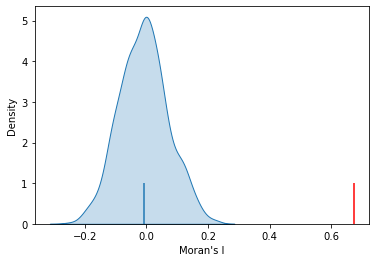

In [59]:
import seaborn as sbn
sbn.kdeplot(mi.sim, shade=True)
plt.vlines(mi.I, 0, 1, color='r')
plt.vlines(mi.EI, 0,1)
plt.xlabel('Moran\'s I')

In [60]:
mi.p_sim

0.001

### 8.3 Local Autocorrelation: Hot Spots, Cold Spots, and Spatial Outliers

In [61]:
#local Moran statistic

In [62]:
np.random.seed(12345)
import esda

In [63]:
wq.transform = 'r'
lag_coviddeathrate = lps.weights.lag_spatial(wq, df['covid_mortality_rate (per 100000)'])

In [64]:
df.rename({'covid_mortality_rate (per 100000)':'coviddeathrate'}, axis = 1, inplace = True)

In [65]:
df.head(3)

,name,Country Code,geometry,Country,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,...,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,coviddeathrate,lag_coviddeathrate,yb
0,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,-6.0,35.0,160,0.549,66.2007,9.221490,...,7,NaN,63298550,Africa,NaN,NaN,662,1.336524,225.286833,0 Low
1,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,60.0,-95.0,15,0.936,82.6565,16.396259,...,99,"66,343,123",38388419,North America,NaN,NaN,845,135.772718,123.920121,1 High
2,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,38.0,-97.0,21,0.921,77.1982,16.280979,...,"1,895","1,174,878,661",334805269,North America,NaN,NaN,"3,173",345.176169,74.540885,1 High


In [66]:
#df = df[df.coviddeathrate != 0]
#df = df[df.lag_coviddeathrate !=0]
df = df.dropna(axis=0, subset=['coviddeathrate','lag_coviddeathrate'])

In [67]:
df['coviddeathrate'].values.reshape(-1,1) #when plotting the graph below there was an error expected x and y to have same length
#that's why the need to reshape, but this would be 2d, it has to be 1d, many errors where found when doing the plotting below
#what worked was reshaping x and y to 1d with values.reshape(-1)

array([[1.33652351e+00],
       [1.35772718e+02],
       [3.45176169e+02],
       [4.76120063e+00],
       [7.21037252e+00],
       [5.76922584e+01],
       [3.35045957e+02],
       [1.01182561e+01],
       [1.09453770e+01],
       [7.36283530e+00],
       [3.96513503e+01],
       [2.72567757e+02],
       [1.68863605e+02],
       [3.32306997e+01],
       [2.53532968e+02],
       [2.17990993e+02],
       [3.25304997e+02],
       [1.86572516e+02],
       [6.52641143e+02],
       [2.76976024e+02],
       [1.93660214e+02],
       [1.79628794e+02],
       [3.31902465e+00],
       [1.08704936e+02],
       [6.45763175e+01],
       [1.08630853e+02],
       [1.66913317e+02],
       [1.63466806e+02],
       [2.35242472e+02],
       [1.98842170e+02],
       [3.70415593e+01],
       [1.14740439e+02],
       [1.55284573e+02],
       [3.46003616e+00],
       [2.03387161e+01],
       [1.27495888e+00],
       [1.19615115e+00],
       [1.45561459e+00],
       [7.05084505e+00],
       [4.51297945e+00],


In [68]:
df['coviddeathrate'].values.reshape(-1)

array([1.33652351e+00, 1.35772718e+02, 3.45176169e+02, 4.76120063e+00,
       7.21037252e+00, 5.76922584e+01, 3.35045957e+02, 1.01182561e+01,
       1.09453770e+01, 7.36283530e+00, 3.96513503e+01, 2.72567757e+02,
       1.68863605e+02, 3.32306997e+01, 2.53532968e+02, 2.17990993e+02,
       3.25304997e+02, 1.86572516e+02, 6.52641143e+02, 2.76976024e+02,
       1.93660214e+02, 1.79628794e+02, 3.31902465e+00, 1.08704936e+02,
       6.45763175e+01, 1.08630853e+02, 1.66913317e+02, 1.63466806e+02,
       2.35242472e+02, 1.98842170e+02, 3.70415593e+01, 1.14740439e+02,
       1.55284573e+02, 3.46003616e+00, 2.03387161e+01, 1.27495888e+00,
       1.19615115e+00, 1.45561459e+00, 7.05084505e+00, 4.51297945e+00,
       3.00623979e+00, 3.36802544e+00, 8.52974774e+00, 1.51689606e+00,
       1.79162513e+00, 2.25248661e+00, 6.65769201e+00, 2.08420710e+01,
       6.77557123e+00, 5.51854590e+00, 3.00993914e-01, 1.33004504e+02,
       1.62651393e+02, 1.01093603e+02, 2.43743990e+02, 1.51730486e+01,
      

In [69]:
df

,name,Country Code,geometry,Country,Latitude,Longitude,HDI rank,Human Development Index 2021 (HDI),Life expectancy at birth,Expected years of schooling,...,"Serious,Critical",TotalTests,Population,Continent,New Cases/1M pop,New Deaths/1M pop,Active Cases/1M pop,coviddeathrate,lag_coviddeathrate,yb
0,Tanzania,TZA,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...",Tanzania,-6.0000,35.0,160,0.549,66.2007,9.221490,...,7,NaN,63298550,Africa,NaN,NaN,662,1.336524,225.286833,0 Low
1,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",Canada,60.0000,-95.0,15,0.936,82.6565,16.396259,...,99,"66,343,123",38388419,North America,NaN,NaN,845,135.772718,123.920121,1 High
2,United States of America,USA,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",United States,38.0000,-97.0,21,0.921,77.1982,16.280979,...,"1,895","1,174,878,661",334805269,North America,NaN,NaN,"3,173",345.176169,74.540885,1 High
3,Uzbekistan,UZB,"POLYGON ((55.96819 41.30864, 55.92892 44.99586...",Uzbekistan,41.0000,64.0,101,0.727,70.8616,12.477140,...,23,"1,377,915",34382084,Asia,NaN,NaN,254,4.761201,142.982756,0 Low
4,Papua New Guinea,PNG,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ...",Papua New Guinea,-6.0000,147.0,156,0.558,65.3506,10.360771,...,7,"249,149",9292169,Australia/Oceania,NaN,NaN,235,7.210373,162.136834,0 Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,Rwanda,RWA,"POLYGON ((30.41910 -1.13466, 30.81613 -1.69891...",Rwanda,-2.0000,30.0,165,0.534,66.0722,11.230970,...,NaN,"6,021,981",13600464,Africa,NaN,NaN,6,10.793749,48.428753,0 Low
116,Bosnia and Herz.,BIH,"POLYGON ((18.56000 42.65000, 17.67492 43.02856...",Bosnia and Herzegovina,44.0000,18.0,74,0.780,75.3003,13.800000,...,NaN,"1,884,721",3249317,Europe,NaN,NaN,"2,058",501.828538,54.159981,1 High
117,Macedonia,MKD,"POLYGON ((22.38053 42.32026, 22.88137 41.99930...",Macedonia,41.8333,22.0,78,0.770,73.8415,13.624432,...,NaN,"2,226,216",2081304,Europe,NaN,NaN,364,464.420383,351.267957,1 High
118,Serbia,SRB,"POLYGON ((18.82982 45.90887, 18.82984 45.90888...",Serbia,44.0000,21.0,63,0.802,74.1923,14.400090,...,12,"12,648,684",8653016,Europe,NaN,NaN,"1,636",207.788822,291.133975,1 High


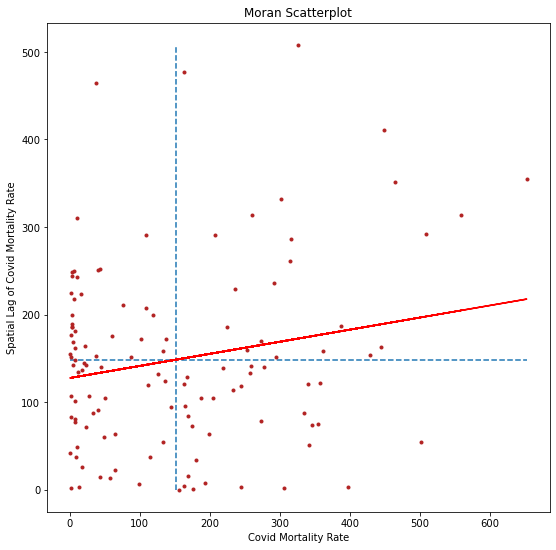

In [70]:
coviddeathrate = df['coviddeathrate'].values.reshape(-1)
lag_coviddeathrate = df['lag_coviddeathrate'].values.reshape(-1)
b, a = np.polyfit(coviddeathrate, lag_coviddeathrate, 1)
f, ax = plt.subplots(1, figsize=(9, 9))

plt.plot(coviddeathrate, lag_coviddeathrate, '.', color='firebrick')

 # dashed vert at mean of the price
plt.vlines(coviddeathrate.mean(), lag_coviddeathrate.min(), lag_coviddeathrate.max(), linestyle='--')
 # dashed horizontal at mean of lagged price 
plt.hlines(lag_coviddeathrate.mean(), coviddeathrate.min(), coviddeathrate.max(), linestyle='--')

# red line of best fit using global I as slope
plt.plot(coviddeathrate, a + b*coviddeathrate, 'r')
plt.title('Moran Scatterplot')
plt.ylabel('Spatial Lag of Covid Mortality Rate')
plt.xlabel('Covid Mortality Rate')
plt.show()

In [71]:
#instead of a single I statistic, there's an array of local Ii statistics, stored in the .Is attribute, and p-value from the simulation are in p_sim

In [72]:
#there might be spatial autocorrelation according to the graph,
#the positive slope means that neighbors of locations with large values have high values, and neighbors of locations
#with small values have small values

In [73]:
li = esda.moran.Moran_Local(y, wq)

In [74]:
li.q

array([3, 2, 1, 3, 3, 3, 1, 3, 3, 3, 3, 1, 4, 2, 1, 1, 1, 1, 1, 1, 1, 4,
       3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 1, 1, 2, 1, 1, 1, 3, 1, 2, 1, 2, 1, 3, 3, 1, 1, 1, 1, 1,
       3, 3, 3, 3, 3, 3, 1, 1, 1, 1])

In [75]:
#using conditional random permutations (different distributions for each focal location)

In [76]:
(li.p_sim < 0.05).sum()

47

In [77]:
#distinguishing the specific type of local spatial association reflected in the four quadrants of the Moran Scatterplot above:

In [78]:
sig = li.p_sim < 0.05
hotspot = sig * li.q==1
coldspot = sig * li.q==3
doughnut = sig * li.q==2
diamond = sig * li.q==4

In [79]:
spots = ['n.sig.', 'hot spot']
labels = [spots[i] for i in hotspot*1]

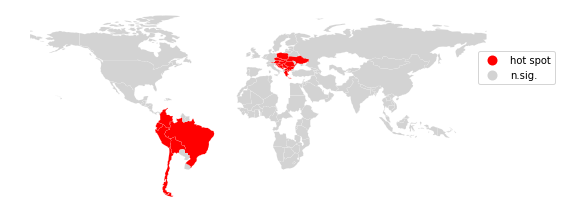

In [80]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['red', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.1, .8))
plt.show()

In [81]:
spots = ['n.sig.', 'cold spot']
labels = [spots[i] for i in coldspot*1]

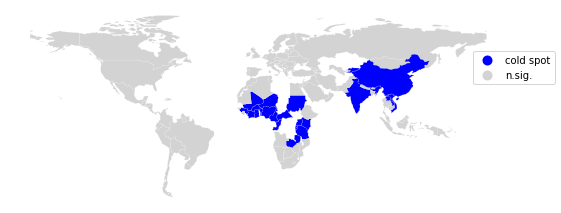

In [82]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['blue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.1, .8))
plt.show()

In [83]:
spots = ['n.sig.', 'doughnut']
labels = [spots[i] for i in doughnut*1]

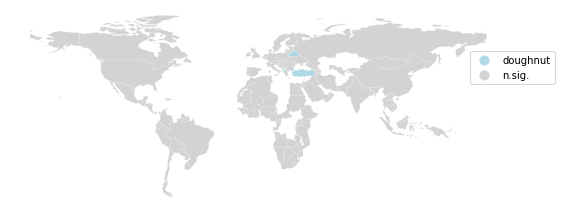

In [84]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['lightblue', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.1, .8))
plt.show()

In [85]:
spots = ['n.sig.', 'diamond']
labels = [spots[i] for i in diamond*1]

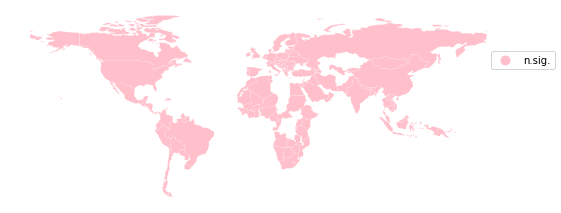

In [86]:
df = df
from matplotlib import colors
hmap = colors.ListedColormap(['pink', 'lightgrey'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.1, .8))
plt.show()

In [87]:
sig = 1 * (li.p_sim < 0.05)
hotspot = 1 * (sig * li.q==1)
coldspot = 3 * (sig * li.q==3)
doughnut = 2 * (sig * li.q==2)
diamond = 4 * (sig * li.q==4)
spots = hotspot + coldspot + doughnut + diamond
spots

array([3, 0, 0, 0, 0, 0, 1, 3, 3, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 0, 0,
       3, 3, 3, 3, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 3,
       0, 0, 0, 0, 3, 0, 0, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 2,
       2, 1, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 3, 3, 1, 1, 1, 1])

In [88]:
spot_labels = [ '0 ns', '1 hot spot', '2 doughnut', '3 cold spot', '4 diamond']
labels = [spot_labels[i] for i in spots]

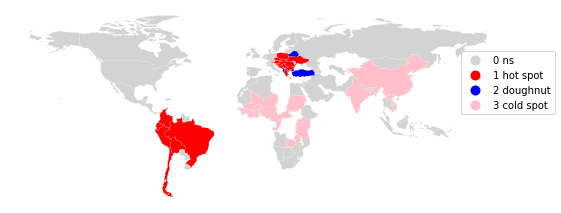

In [89]:
from matplotlib import colors
hmap = colors.ListedColormap([ 'lightgrey', 'red', 'lightblue', 'blue', 'pink'])
f, ax = plt.subplots(1, figsize=(9, 9))
df.assign(cl=labels).plot(column='cl', categorical=True, \
        k=2, cmap=hmap, linewidth=0.1, ax=ax, \
        edgecolor='white', legend=True)
ax.set_axis_off()
leg = ax.get_legend()
leg.set_bbox_to_anchor((0., 0., 1.1, .8))
plt.show()